<a href="https://colab.research.google.com/github/elinteerie/My-First-Machine-Learning-Model/blob/main/hand_written_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model to classify hand-written digits 0-9

In [4]:
#Import all Libraries
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
#Load Dataset from Sklearn
from sklearn.datasets import load_digits
digits = load_digits()


In [6]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [7]:
digits.data


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digits.data.shape

(1797, 64)

In [9]:
digits.target.shape

(1797,)

In [10]:
img = digits.images[13]
img

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

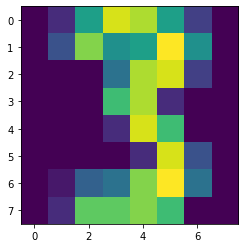

In [11]:
imgplot = plt.imshow(img)

In [12]:
img15 = digits.images[15]

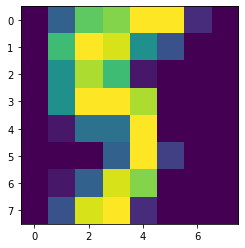

In [13]:
imgplot = plt.imshow(img15)

In [15]:
#Split Data_sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1257, 64), (540, 64), (1257,), (540,))

In [16]:
#Train Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
#Fit the Model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
#Predictions
predicted = knn.predict(X=X_test)
expected = y_test

In [19]:
predicted[18]

5

In [ ]:
expected[18]

In [20]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(5, 3),
 (2, 8),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8),
 (1, 8),
 (1, 8)]

In [21]:
len(wrong)

12

In [22]:
#Model Predicted 12 wrong#

In [23]:
knn.score(X_test, y_test)

0.9777777777777777

In [24]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


In [25]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)


In [26]:
confusion

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  3,  1,  2,  0,  0,  0,  0, 44,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 50]])

In [27]:
from sklearn.metrics import classification_report
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted,target_names=names)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.95      1.00      0.97        54
           2       0.98      1.00      0.99        61
           3       0.96      0.96      0.96        55
           4       0.98      0.98      0.98        58
           5       0.98      1.00      0.99        51
           6       1.00      1.00      1.00        57
           7       0.96      1.00      0.98        52
           8       0.98      0.86      0.92        51
           9       0.98      0.96      0.97        52

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



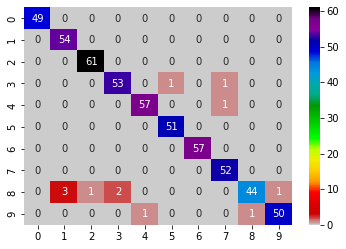

In [33]:
#Confusion MatriX

confusion_df = pd.DataFrame(confusion, index=range(10),columns=range(10))   
import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True,cmap='nipy_spectral_r') 

In [34]:
#Using Cross_Validation on dataset

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=kfold)

In [36]:
scores

array([0.98412698, 0.98412698, 1.        , 0.96031746, 0.97619048,
       0.99206349, 0.98412698, 0.976     , 1.        , 0.992     ])

In [43]:
#The Mean score

print(f'The Mean Accuracy {scores.mean():.2%} ')

The Mean Accuracy 98.49% 


Lets Try Other Model and see the one which works best

In [49]:
#Import Other Model and see the one which works out best
 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [56]:
estimators ={
    'KNeighborsClassifier': knn,
    'SVC': SVC( ),
    'GaussianNB': GaussianNB()}


In [57]:
for estimator_name, estimator_values in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_values, 
             X=digits.data, y=digits.target, cv=kfold)


In [58]:
print(f'{estimator_name:}: ' +
      f'mean accuracy={scores.mean():.2%}; ' + 
      f'standard deviation={scores.std():.2%}')       

GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


In [ ]:
for k in range(1, 20, 2):    ...:     kfold = KFold(n_splits=10, random_state=11, shuffle=True)    ...:     knn = KNeighborsClassifier(n_neighbors=k)    ...:     scores = cross_val_score(estimator=knn,     ...:         X=digits.data, y=digits.target, cv=kfold)    ...:     print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +    ...:           f'standard deviation={scores.std():.2%}') 

In [59]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +f'standard deviation={scores.std():.2%}') 






k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.78%; standard deviation=0.74%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.83%; standard deviation=0.95%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%
